# Kecerdasan Buatan

## Tugas 2: k-Nearest Neighbours & k-Means

### Mekanisme

Anda hanya diwajibkan untuk mengumpulkan file ini saja ke uploader yang disediakan di http://elearning2.uai.ac.id/. Ganti nama file ini saat pengumpulan menjadi tugas2_NIM.ipynb.

**Keterlambatan**: Pengumpulan tugas yang melebihi tenggat yang telah ditentukan tidak akan diterima. Keterlambatan akan berakibat pada nilai nol untuk tugas ini.

**Kolaborasi**: Anda diperbolehkan untuk berdiskusi dengan teman Anda, tetapi dilarang keras menyalin kode maupun tulisan dari teman Anda.

### Petunjuk

_Packages_ yang Anda akan gunakan dalam mengerjakan tugas ini antara lain:

- matplotlib
- numpy
- pandas
- pillow
- scipy
- seaborn

Anda diperbolehkan (jika dirasa perlu) untuk mengimpor modul tambahan untuk tugas ini. Namun, seharusnya modul yang tersedia sudah cukup untuk memenuhi kebutuhan Anda. Untuk kode yang Anda ambil dari sumber lain, **cantumkan URL menuju referensi tersebut jika diambil dari internet**!

Perhatikan poin untuk tiap soal! **Semakin kecil poinnya, berarti kode yang diperlukan untuk menjawab soal tersebut seharusnya semakin sedikit!**

**NIM:**

**Nilai akhir: XX/50**

### Deskripsi Dataset

Pada tugas kali ini, Anda akan melihat penggunaan algoritma yang berbasis pada jarak antarobjek. Anda diberikan dataset berupa gambar angka-angka yang ditulis tangan. Dataset ini adalah versi yang lebih sederhana dari MNIST yang sering digunakan. Ukuran tiap gambar angka dalam dataset ini dalah 8x8 pixels. Deskripsi lengkapnya dapat Anda lihat di [sini](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits). Tugas Anda kali ini adalah menerapkan algoritma k-NN dan k-Means untuk melakukan prediksi dan pengelompokan 10 angka tersebut dan mengevaluasi hasilnya.

### Mengimpor Modul dan Dataset

In [1]:
from __future__ import print_function, division # Gunakan print(...) dan bukan print ...
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

%matplotlib inline

RANDOM_STATE = 1337
np.random.seed(RANDOM_STATE)

## 1. Eksplorasi Awal Data (10 poin)

Pada bagian ini, Anda diminta untuk mengeksplorasi data latih yang diberikan. Selalu gunakan data ini kecuali diberitahukan sebaliknya.

In [20]:
X, y = load_digits(return_X_y=True)

In [21]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

### Soal 1.1.a (2 poin)

Pisahkan dataset Anda menjadi `X_train`, `X_test`, `y_train`, dan `y_test` dengan `train_test_split()`. Pastikan bahwa data uji Anda terdiri dari 30% total data.

In [4]:
X_train, X_test, y_train, y_test = train_test_split (X,y, train_size = 0.7, test_size = 0.3, random_state = RANDOM_STATE)

### Soal 1.1.b (2 poin)

Tunjukkan jumlah objek untuk masing-masing kelas dari `y_train` dan `y_test` dalam *bar plot*.

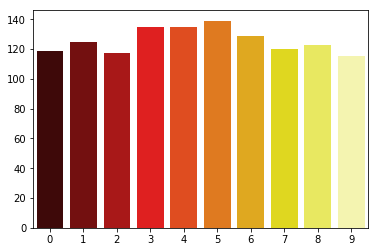

In [5]:
i = np.array([y_train])
unique_elements, counts_elements = np.unique(i, return_counts=True)
sns.barplot(unique_elements, counts_elements, palette="hot")

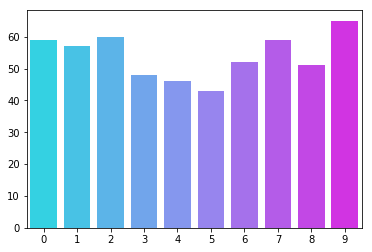

In [6]:
j = np.array([y_test])
unique_elements, counts_elements = np.unique(j, return_counts=True)
sns.barplot(unique_elements, counts_elements, palette="cool")

Referensi :
https://matplotlib.org/examples/api/barchart_demo.html

### Soal 1.2 (3 poin)

Gambarkan histogram dari pixel ke-0 (pojok kiri atas) dan ke-4. Perbedaan apa yang dapat Anda lihat? Mengapa hasilnya seperti itu?

Text(0, 0.5, 'Frequency')

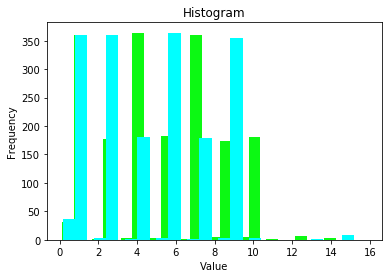

In [7]:
a = X[0]
b = X[4]
plt.hist([a, y], facecolor='#0cf913', label='pixel 0')
plt.hist([b, y], facecolor='cyan', label='pixel 4')
plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

*Referensi https://plot.ly/matplotlib/histograms/*

*Pada pixel 0 (warna hijau), diketahui bahwa frequencynya lebih banyak hingga value <10, sedangkan pixel 4 (warna cyan), diketahui bahwa datanya dari value 0-15 cukup stabil frequencynya*

### Soal 1.3 (3 poin)

Ambil 10 sampel gambar dari `X_train`, lalu tampilkan gambarnya.

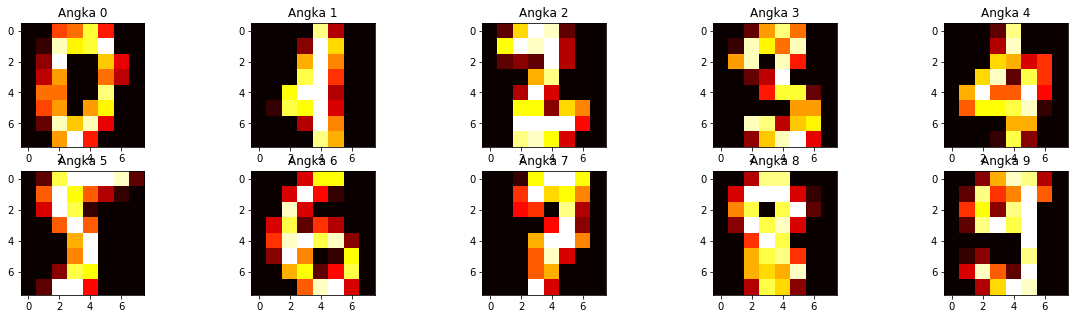

In [8]:
no_class = 10
fig, axes = plt.subplots(2,5,figsize=(20,5))
for ax, i in zip(axes.flatten(), range(no_class)):
    index = np.where(y_train==i)
    ax.set_title('Angka {}'.format(i))
    ax.imshow(X_train[index][0].reshape(8,8), cmap='hot')
plt.show()

## 2. k-Nearest Neighbours (10 poin)

Anda akan melakukan klasifikasi digit tersebut dengan menggunakan algoritma k-NN.

### Soal 2.1.a (5 poin)

Dengan k-Nearest Neighbours, klasifikasikan data latih dengan menggunakan *cross-validation* (`cross_val_score()`) dan $k \in [1,10]$, lalu gambarkan *line plot* perubahan akurasi rata-ratanya! Jangan lupa untuk memberikan label pada sumbu-sumbunya!

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the defau

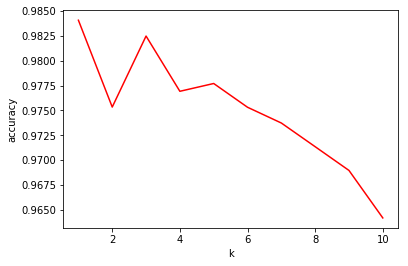

In [9]:
acc = []
for k in range(1,11):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    crossvalscore = cross_val_score(knn, X_train, y_train, scoring='accuracy')
    acc.append(crossvalscore.mean())

plt.plot(range(1,11), acc, color='r')
plt.xlabel('k')
plt.ylabel('accuracy');

*Referensi Lab 3 AI*

### Soal 2.1.b (2 poin)

Dari plot tersebut, berapa nilai $k$ yang akan Anda pilih? Mengapa?

*k yang saya pilih adalah 3, karena nilai accuracynya yang tinggi dan juga memiliki lebih dari 1 cluster*

### Soal 2.1.c (3 poin)

Dari nilai $k$ yang Anda pilih, buatlah *heatmap* dari *confusion matrix* yang diperoleh dari klasifikasi data ujinya! Jangan lupa untuk memberikan label untuk masing-masing sumbunya dan menganotasi tiap kotak pada *heatmap*. Sertakan juga nilai akurasinya.

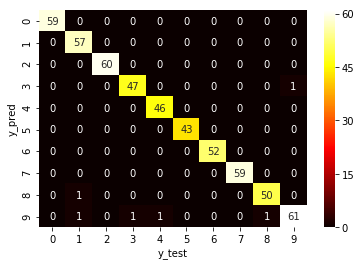

In [10]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

confmat = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(confmat, annot=True, cmap='hot')
ax.set_xlabel ('y_test')
ax.set_ylabel ('y_pred')
plt.show()

*Referensi : https://seaborn.pydata.org/generated/seaborn.heatmap.html*

### Soal 2.2 (2 poin)

Mengapa k-NN disebut sebagai algoritma klasifikasi non-parametrik? Apa yang membedakannya dengan algoritma klasifikasi parametrik?

*Karena k-NN tidak memiliki batasan pada saat pembelajaran (tidak adanya asumsi tentang fungsi pemetaannya), sedangkan klasifikasi parametrik memerlukan asumsi guna menyederhakan proses pembelajaran. KNN hanya melihat pada jarak terdekat nya saja tanpa ada parameter yang perlu dicari.*

## 3. k-NN Regression (10 poin)

Terkadang, gambar yang kita miliki mengalami kerusakan. Salah satu cara untuk memperbaikinya adalah dengan memprediksi pixel yang rusak tersebut dengan pixels yang kita miliki. Untuk memahami kasus ini lebih baik, Anda dapat melihat contohnya di [sini](http://scikit-learn.org/stable/auto_examples/plot_multioutput_face_completion.html).

### Soal 3.1 (2 poin)

Anggap saja pixel ke-42 mengalami kerusakan sehingga akan Anda prediksi. Oleh karena itu, Anda akan mencoba melakukan regresi dengan mengambil pixel di kiri dan di atas dari pixel ke-42, i.e. pixel ke-41 dan ke-34. Buatlah data latih dan data uji baru dengan menggunakan ide ini.

In [11]:
KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

### Soal 3.2 (5 poin)

Lakukan *cross-validation* pada data latih untuk regresi dengan k-NN guna memprediksi nilai pixel ke-42 untuk $k \in [1,10]$ lalu laporkan RMSE-nya dalam bentuk *line plot*. Apa yang dapat Anda amati?

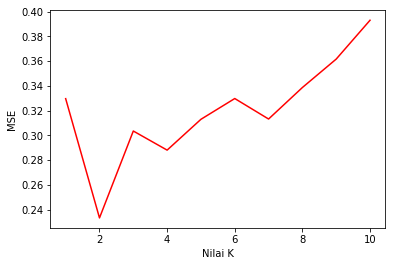

In [12]:
mse=[]

for k in list(range(1,11)):
    knr = KNeighborsRegressor(k)
    knr.fit(X_train, y_train)
    y_pred = knr.predict(X_test)
    mse.append(mean_squared_error(y_test,y_pred))

plt.xlabel("Nilai K")
plt.ylabel("MSE")
plt.plot(range(1,11), mse , color="Red")
plt.show()

*Dapat diketahui bahwa pada K=2 dan K=4 merupakan K terbaik, karena nilai msenya lebih mendekati nilai 0, dibandingkan dengan nilai K yang lain*

### Soal 3.3 (3 poin)

Pilih dua nilai $k$ terbaik. Lalu coba lakukan regresi pada data uji yang telah dibuat. Apa pendapat Anda terhadap hasil yang Anda dapatkan ini?

In [13]:
#mse = []
#knr = KNeighborsRegressor()
#knr.fit(X_train, y_train)
#y_pred = knr.predict(X_test)
#mse.append(mean_squared_error(y_test, y_pred))

#plt.plot(range(1,11), mse);

## 4. k-Means (20 poin)

*Jawaban Anda di sini*

### Soal 4.1.a (2 poin)

Gunakan `KMeans` untuk melakukan *clustering* dengan $k=10$.

*Referensi http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb*

In [14]:
model = KMeans(n_clusters=10, random_state=RANDOM_STATE).fit(X_train)
model.fit_predict(X_train)

array([0, 8, 6, ..., 0, 4, 8])

In [22]:
X_train

array([[ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  3.,  0.,  0.],
       [ 0.,  0.,  0., ...,  3.,  0.,  0.],
       ...,
       [ 0.,  0.,  9., ..., 16.,  2.,  0.],
       [ 0.,  4., 12., ...,  6.,  0.,  0.],
       [ 0.,  0., 10., ...,  0.,  0.,  0.]])

### Soal 4.1.b (4 poin)

Dari hasil *clustering* yang telah Anda lakukan, coba gambarkan *centroids*-nya dari atribut `cluster_centers_` yang dihasilkan dari objek `KMeans` menggunakan `imshow()`. Ubah ukuran dimensi tiap *centroid* menjadi 8x8. Apa yang dapat Anda amati?

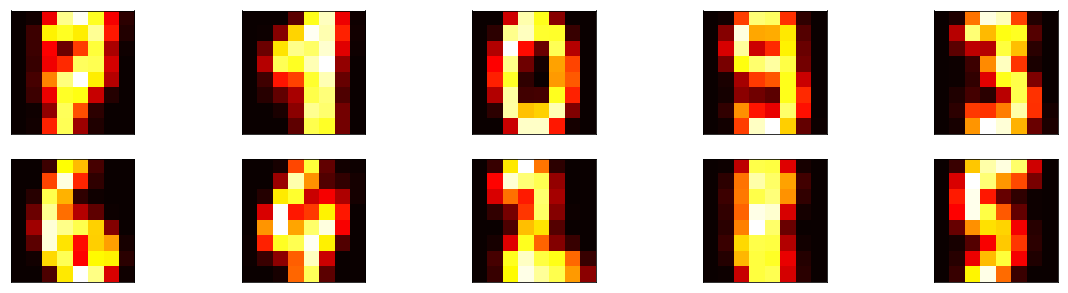

In [16]:
clusters = model.fit(X_train)
model.cluster_centers_.shape
fig, ax = plt.subplots(2,5,figsize=(20,5))
centers = model.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap='hot')

*Saya dapat mengamati beragam gambar dari dataset yang telah diberikan model KMeans*

### Soal 4.2 (4 poin)

Lakukan kembali *clustering* dengan `KMeans`, tapi kali ini gunakan nilai $k \in [5,15]$. Laporkan nilai inertia dari proses *clustering* dalam *scree plot*. Mengapa *scree plot*-nya seperti itu?

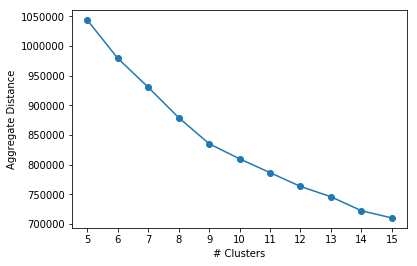

In [17]:
v= []
for i in range(5,16):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_train)
    v.append(kmeans.inertia_)

plt.plot(range(5,16), v, 'o-')
plt.xticks(range(5,16))
plt.xlabel('# Clusters')
plt.ylabel('Aggregate Distance')
plt.show()

*Semakin banyaknya cluster, maka semakin dekat pula jarak untuk ke titik centroid*

### Soal 4.3.a (4 poin)

Coba lakukan klasifikasi dengan memanfaatkan algoritma k-Means. Perhatikan bahwa saat akan membandingkan label, Anda harus melakukan *class assignment* untuk tiap klaster secara *greedy*. Laporkan akurasi yang dihasilkan dengan metode ini.

In [18]:
kmeans = KMeans(n_clusters=10, random_state=RANDOM_STATE)
kmeans.fit(X)
lable = kmeans.predict(X_test)
accuracy = accuracy_score(lable,y_test)

print("Akurasinya = ", accuracy)

Akurasinya =  0.22407407407407406


### Soal 4.3.b (2 poin)

Gambarkan *heatmap* dari *confusion matrix* yang dihasilkan dari klasifikasi di atas. Jangan lupa untuk memberikan label yang sesuai untuk tiap sumbunya.

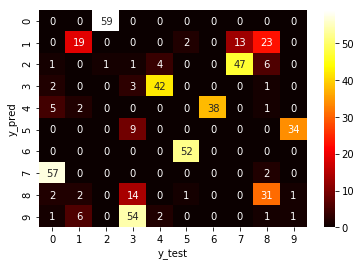

In [19]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

confmat = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(confmat, annot=True, cmap='hot')
ax.set_xlabel ('y_test')
ax.set_ylabel ('y_pred')
plt.show()

### Soal 4.4 (4 poin)

Berikan kesimpulan dari eksplorasi yang telah Anda lakukan dalam keseluruhan tugas ini.

*Dari kesuluruhan tugas ini adalah bahwa k-NN merupakan algoritma yang cocok untuk klasifikasi dan regresi dan bersifat non-parametrik, serta perlu adanya validasi nilai k, sedangkan k-Means merupakan algoritma yang cocok untuk clustering dan sangat bergantung pada inisialisasi centroid*